# Wine Quality Classifier
> Griffin Davis and Sydnee Haney

## Imports

In [14]:
import pandas as pd
import numpy as np
from urllib.request import urlopen, HTTPError
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Read in Data

In [15]:
fr = None
try:
    fr = urlopen(
        'https://raw.githubusercontent.com/davisgriffin/Machine_Learning/main/Datasets/winequality.csv')
except HTTPError:
    raise Exception('Cannot read data')
X = pd.read_csv(fr)
fr.close()
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Format and Split Data

In [16]:
scaler = StandardScaler()

X.dropna()
y = X['quality']

X.drop(columns='quality', inplace=True)
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

## Train Model

In [17]:
model = LogisticRegression(max_iter=200).fit(X_train, y_train)
prediction = model.predict(X_test)
score = model.score(X_test, y_test)

print('''R^2: {:.4f}
Mean Absolute Percentage Error: {:.4f}%'''.format(score, MAPE(y_test, prediction)*100))

R^2: 0.5831
Mean Absolute Percentage Error: 8.1714%


## Plot

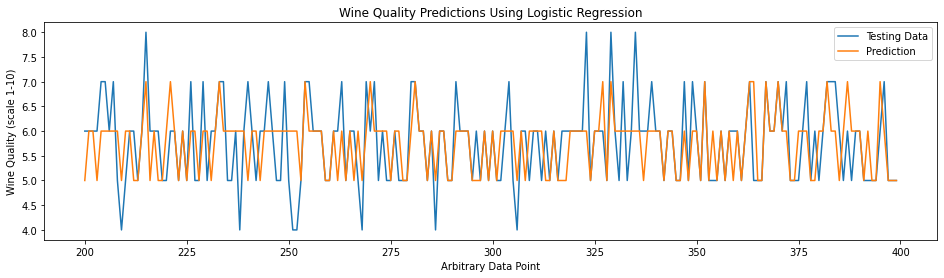

In [18]:
data_min = 200
data_max = 400
x = np.arange(len(prediction))

plt.close('all')

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(111)

plt.plot(x[data_min:data_max], y_test[data_min:data_max], label='Testing Data')
plt.plot(x[data_min:data_max], prediction[data_min:data_max], label='Prediction')

plt.xlabel('Arbitrary Data Point')
plt.ylabel('Wine Quality (scale 1-10)')
plt.title('Wine Quality Predictions Using Logistic Regression')
plt.legend()

fig.set_size_inches(16, 4, forward=True)
plt.show()